In [10]:
#imports
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
#This function will take in a filename, featurename, and target feature and run univariate linear regression. It will return the mean squared error, root mean squared error, and r2 score. It will also plot the results
def perform_linear_regression(csv_file, feature_column, target_column):
    data = pd.read_csv(csv_file)
    
    X = data[feature_column].values.reshape(-1, 1)
    y = data[target_column].values
    
    #remove missing values
    nan_indices = np.isnan(y)
    X = X[~nan_indices]
    y = y[~nan_indices]

    model = LinearRegression()
    model.fit(X, y)
    predictions = model.predict(X)
    
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, predictions)


    plt.scatter(X, y, label='Actual Data')
    plt.plot(X, predictions, color='red', label='Line of Best Fit')
    plt.xlabel(feature_column)
    plt.ylabel(target_column)
    plt.title('Univariate Linear Regression for ' + feature_column)
    plt.legend()

    plt.show()
    return mse, rmse, r2

/var/folders/6m/1wyk0cv146d91z1nsb6cxh6w0000gn/T/ipykernel_54650/3680704897.py:3: DtypeWarning: Columns (12,15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(csv_file)


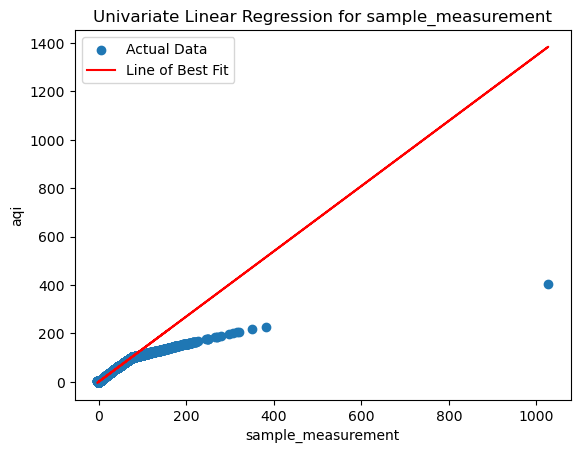

In [14]:
#Call the function
csv_file = 'csv/aqi_cleaned_Boston.csv'  #filename here
target_var = 'aqi'  # Replace with the actual target column name
features = ['sample_measurement']
for feature in features:
    perform_linear_regression(csv_file, feature, target_var)